# Análise de Dados Aprendizado de Máquina - NBA

_descrever objetivo do trabalho e etc_

## Informações do Aluno:

* Nome: Gabriel Castelo Branco Rocha Alencar Pinto
* Matrícula: 2020006523


## Imports e Pré definiçao

Aqui são importados os módulos necessários para rodar o sistema, assim como uma pré definição de especificações do matplotlib para garantir o funcionamento correto da análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import modules.supervisioned as sup
import modules.unsupervisioned as uns
import numpy as np

plt.style.use("seaborn")

plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4


def despine(ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_8094/1731320825.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Aprendizado supervisionado

No aprendizado supervisionado, é utilizada a técnica KNN (_K Nearest Neightbours_). O algoritmo KNN consiste em, baseado na distância euclidiana, buscar os K vizinhos mais próximos de um determinado ponto e, com base na classificação da maioria dentre esses K vizinhos, decidir qual a classificação desse ponto.

In [2]:
df_treino = pd.read_csv("./data/nba_treino.csv")
df_treino.head()

df_treino['TARGET_5Yrs'] = df_treino["TARGET_5Yrs"].astype(bool)

In [3]:
df_teste = pd.read_csv("./data/nba_teste.csv")
df_teste.head()

df_teste['TARGET_5Yrs'] = df_teste["TARGET_5Yrs"].astype(bool)

In [4]:
classifier2 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 2)
classifier2.train()

classifier10 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 10)
classifier10.train()

classifier25 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 25)
classifier25.train()

classifier50 = sup.KNNClassifier(df_treino, "TARGET_5Yrs", 50)
classifier50.train()

In [5]:
classifs = [classifier2, classifier10, classifier25, classifier50]
a = []

for i in classifs:
    a.append(i.predict(df_teste))

In [12]:
for idx, i in enumerate(classifs):
    i.results(a[idx])

| Relatório de algoritmo KNN, K = 2 |
| MATRIZ DE CONFUSÃO |
 
              ------------------ 
 
              |  141  |  27  |
 
              -------------------
 
              |  76  |  24  |
 
              -------------------

| MÉTRICAS |
 
              -> Acurácia: 61.57
 
              -> Recall: 83.93 
 
              -> Precisão: 64.98 
 
              -> Medida F1: 73.25
| Relatório de algoritmo KNN, K = 10 |
| MATRIZ DE CONFUSÃO |
 
              ------------------ 
 
              |  132  |  36  |
 
              -------------------
 
              |  55  |  45  |
 
              -------------------

| MÉTRICAS |
 
              -> Acurácia: 66.04
 
              -> Recall: 78.57 
 
              -> Precisão: 70.59 
 
              -> Medida F1: 74.37
| Relatório de algoritmo KNN, K = 25 |
| MATRIZ DE CONFUSÃO |
 
              ------------------ 
 
              |  124  |  44  |
 
              -------------------
 
              |  48  |  52  |
 
              ------

## Aprendizado Não Supervisionado

Ao contrário do algortimo KNN, que busca _rotular_ um conjunto de dados, o algoritmo K-means busca realizar um agrupamento.

A ideia é verificar a existência de K grupos dentro de um conjunto de dados, sem dizer explicitamente o que cada um desses grupos é, mas tendo a noção de agrupamento.


In [7]:
# Para simular a ausência de um rótulo, removemos a coluna de Target.

df_treino = pd.read_csv('./data/nba_treino.csv')
df_treino.drop('TARGET_5Yrs', axis=1, inplace=True)

In [8]:
grouper2 = uns.KMeansClassifier(df_treino, 2)

grouper2.train()

Algoritmo centrado para K = 2
Grupo 0: 486 pontos
Grupo 1: 586 pontos


In [9]:
grouper3 = uns.KMeansClassifier(df_treino, 3)

grouper3.train()

Algoritmo centrado para K = 3
Grupo 0: 338 pontos
Grupo 1: 319 pontos
Grupo 2: 415 pontos


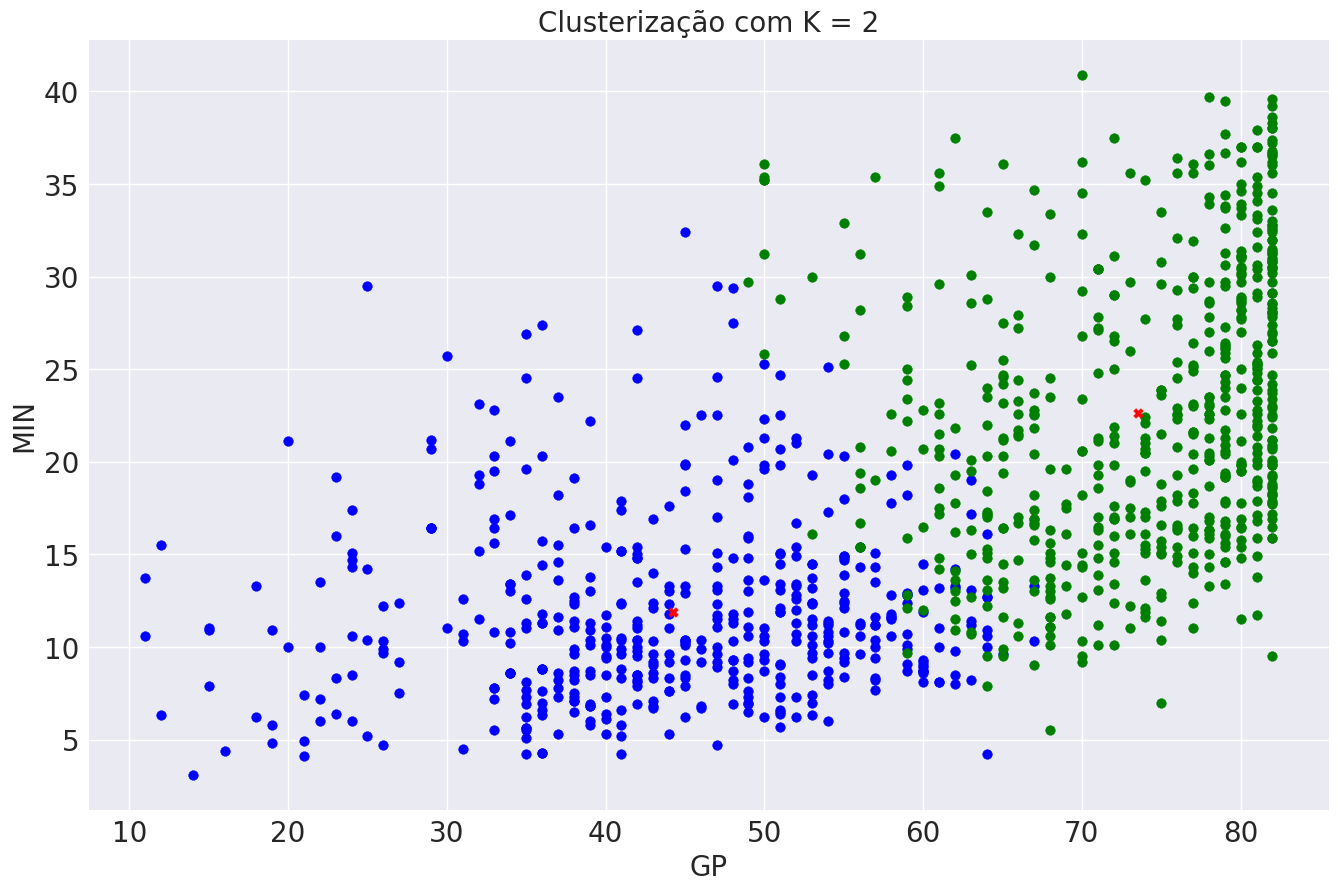

In [10]:
gps = grouper2.get_groups()
ctrs = grouper2.get_centroids()

g1 = gps[0]
g2 = gps[1]


aux = []
aux2 = []

atr1 = "GP"
atr2 = "MIN"

for i in g1:
    aux.append(i.get_attrs_as_list([atr1, atr2]))

for i in g2:
    aux2.append(i.get_attrs_as_list([atr1, atr2]))
    

aux = np.array(aux)
aux2 = np.array(aux2)

fig, ax = plt.subplots()

ax.set_title("Clusterização com K = 2")
ax.set_xlabel(atr1)
ax.set_ylabel(atr2)

ax.scatter(aux[:, 0], aux[:, 1], c="blue")
ax.scatter(aux2[:, 0], aux2[:, 1], c="green")

for i in ctrs:
    ax.scatter(i.get_attrs_as_list([atr1, atr2])[0], i.get_attrs_as_list([atr1, atr2])[1], marker="X", c='red', )
fig.show()

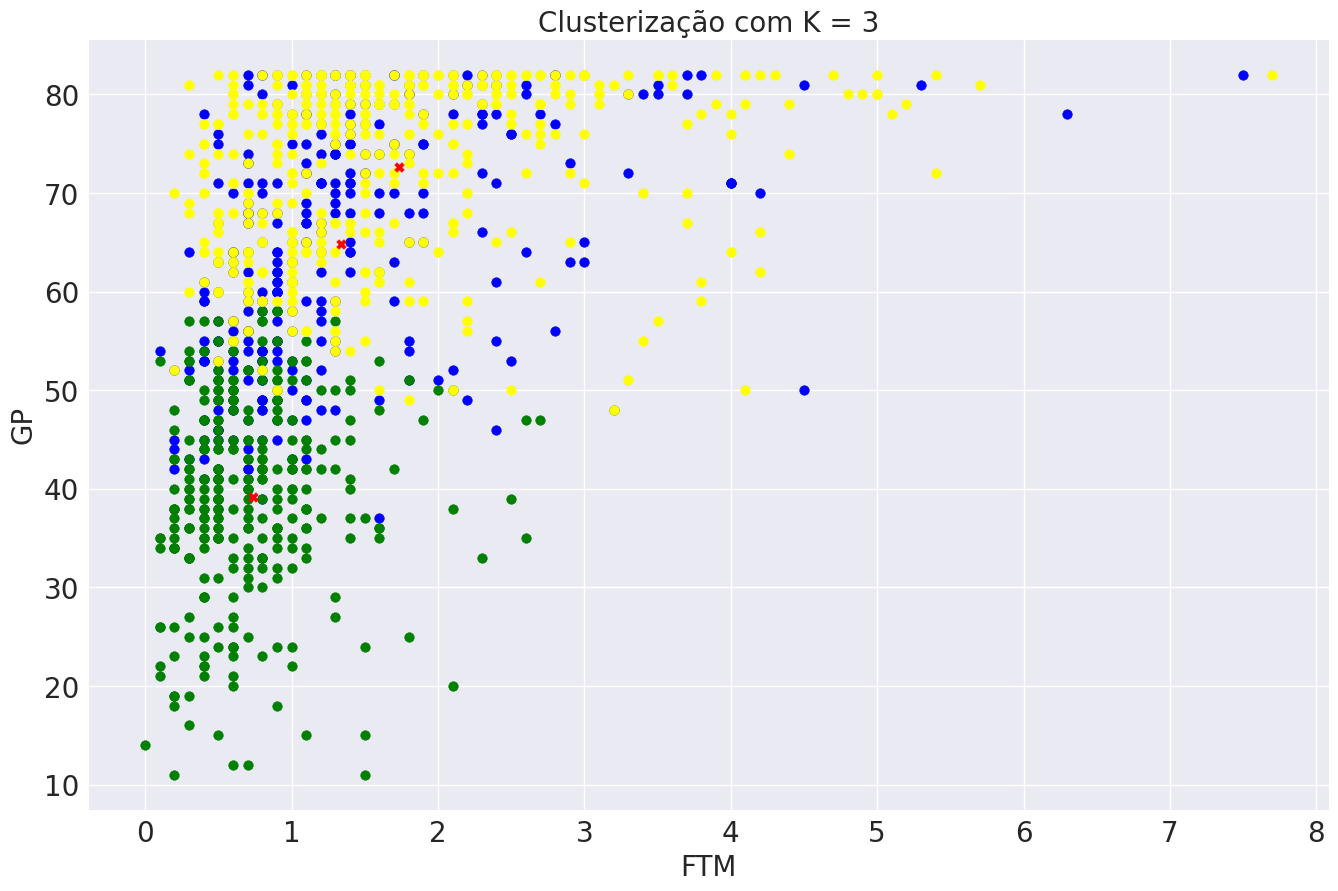

In [11]:
gps = grouper3.get_groups()
ctrs = grouper3.get_centroids()

g1 = gps[0]
g2 = gps[1]
g3 = gps[2]

aux = []
aux2 = []
aux3 = []

atr1 = "FTM"
atr2 = "GP"

for i in g1:
    aux.append(i.get_attrs_as_list([atr1, atr2]))

for i in g2:
    aux2.append(i.get_attrs_as_list([atr1, atr2]))
    
for i in g3:
    aux3.append(i.get_attrs_as_list([atr1, atr2]))
    

aux = np.array(aux)
aux2 = np.array(aux2)
aux3 = np.array(aux3)

fig, ax = plt.subplots()

ax.set_title("Clusterização com K = 3")
ax.set_xlabel(atr1)
ax.set_ylabel(atr2)

ax.scatter(aux[:, 0], aux[:, 1], c="blue")
ax.scatter(aux2[:, 0], aux2[:, 1], c="green")
ax.scatter(aux3[:, 0], aux3[:, 1], c="yellow")

for i in ctrs:
    ax.scatter(i.get_attrs_as_list([atr1, atr2])[0], i.get_attrs_as_list([atr1, atr2])[1], marker="X", c='red')
    
fig.show()